In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import torch
import json

from sklearn.metrics import r2_score

from biological_fuzzy_logic_networks.DREAM_analysis.model_analysis_utils import get_test_data_formatted, mean_RMSE
from biological_fuzzy_logic_networks.DREAM_analysis.utils import create_bfz

/dccstor/ipc1/.conda/envs/biofuzznet2/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
best_param = 1

In [3]:
# Average over folds
data_folder = "/dccstor/ipc1/CAR/DREAM/"
run_base = f"{data_folder}Model/Test/Subnetwork/"
param_number = 1

test_outputs = []
test_unscaleds = []
true_scaleds = []
for i in range(5):
    print(i)
    param_setting=f"{param_number}_{i}"
    run_folder = f"{run_base}{param_setting}/"
    test_output, test_unscaled, test_scaled = get_test_data_formatted(run_base, data_folder, param_setting)
    
    test_outputs.append(test_output)
    test_unscaleds.append(test_unscaled)
    true_scaleds.append(test_scaled) 

0
['HCC1187', 'HCC1500', 'HDQP1', 'MDAMB157', 'MDAMB361', 'OCUBM', 'T47D', 'ZR7530']
['BT20' 'BT474' 'BT549' 'CAL148' 'CAL51' 'CAL851' 'DU4475' 'EFM192A'
 'EVSAT' 'HBL100' 'HCC1187' 'HCC1395' 'HCC1419' 'HCC1500' 'HCC1569'
 'HCC1599' 'HCC1937' 'HCC1954' 'HCC2185' 'HCC3153' 'HCC38' 'HCC70' 'HDQP1'
 'JIMT1' 'MCF7' 'MDAMB134VI' 'MDAMB157' 'MDAMB175VII' 'MDAMB361'
 'MDAMB415' 'MDAMB453' 'MFM223' 'MPE600' 'MX1' 'OCUBM' 'T47D' 'UACC812'
 'UACC893' 'ZR7530']
Splitting based on validation cell line(s)


/u/adr/Code/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/DREAM_analysis/utils.py:239: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train[markers] = scaler.transform(train[markers])
/u/adr/Code/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/DREAM_analysis/utils.py:241: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid[markers] = scaler.transform(valid[markers])
/u/adr/Code/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/DREAM_analysis/utils.py:243: Setti

1
['BT549', 'CAL51', 'HCC1419', 'HCC38', 'MCF7', 'MDAMB134VI', 'MDAMB175VII', 'MX1']
['BT20' 'BT474' 'BT549' 'CAL148' 'CAL51' 'CAL851' 'DU4475' 'EFM192A'
 'EVSAT' 'HBL100' 'HCC1187' 'HCC1395' 'HCC1419' 'HCC1500' 'HCC1569'
 'HCC1599' 'HCC1937' 'HCC1954' 'HCC2185' 'HCC3153' 'HCC38' 'HCC70' 'HDQP1'
 'JIMT1' 'MCF7' 'MDAMB134VI' 'MDAMB157' 'MDAMB175VII' 'MDAMB361'
 'MDAMB415' 'MDAMB453' 'MFM223' 'MPE600' 'MX1' 'OCUBM' 'T47D' 'UACC812'
 'UACC893' 'ZR7530']
Splitting based on validation cell line(s)


/u/adr/Code/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/DREAM_analysis/utils.py:239: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train[markers] = scaler.transform(train[markers])
/u/adr/Code/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/DREAM_analysis/utils.py:241: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid[markers] = scaler.transform(valid[markers])
/u/adr/Code/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/DREAM_analysis/utils.py:243: Setti

2
['BT474', 'CAL148', 'CAL851', 'EFM192A', 'HBL100', 'HCC1569', 'HCC70', 'UACC893']
['BT20' 'BT474' 'BT549' 'CAL148' 'CAL51' 'CAL851' 'DU4475' 'EFM192A'
 'EVSAT' 'HBL100' 'HCC1187' 'HCC1395' 'HCC1419' 'HCC1500' 'HCC1569'
 'HCC1599' 'HCC1937' 'HCC1954' 'HCC2185' 'HCC3153' 'HCC38' 'HCC70' 'HDQP1'
 'JIMT1' 'MCF7' 'MDAMB134VI' 'MDAMB157' 'MDAMB175VII' 'MDAMB361'
 'MDAMB415' 'MDAMB453' 'MFM223' 'MPE600' 'MX1' 'OCUBM' 'T47D' 'UACC812'
 'UACC893' 'ZR7530']
Splitting based on validation cell line(s)


/u/adr/Code/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/DREAM_analysis/utils.py:239: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train[markers] = scaler.transform(train[markers])
/u/adr/Code/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/DREAM_analysis/utils.py:241: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid[markers] = scaler.transform(valid[markers])
/u/adr/Code/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/DREAM_analysis/utils.py:243: Setti

3
['BT20', 'DU4475', 'EVSAT', 'HCC1395', 'HCC1937', 'HCC2185', 'MDAMB415', 'MFM223']
['BT20' 'BT474' 'BT549' 'CAL148' 'CAL51' 'CAL851' 'DU4475' 'EFM192A'
 'EVSAT' 'HBL100' 'HCC1187' 'HCC1395' 'HCC1419' 'HCC1500' 'HCC1569'
 'HCC1599' 'HCC1937' 'HCC1954' 'HCC2185' 'HCC3153' 'HCC38' 'HCC70' 'HDQP1'
 'JIMT1' 'MCF7' 'MDAMB134VI' 'MDAMB157' 'MDAMB175VII' 'MDAMB361'
 'MDAMB415' 'MDAMB453' 'MFM223' 'MPE600' 'MX1' 'OCUBM' 'T47D' 'UACC812'
 'UACC893' 'ZR7530']
Splitting based on validation cell line(s)


/u/adr/Code/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/DREAM_analysis/utils.py:239: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train[markers] = scaler.transform(train[markers])
/u/adr/Code/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/DREAM_analysis/utils.py:241: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid[markers] = scaler.transform(valid[markers])
/u/adr/Code/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/DREAM_analysis/utils.py:243: Setti

4
['HCC1599', 'HCC1954', 'HCC3153', 'JIMT1', 'MDAMB453', 'MPE600', 'UACC812']
['BT20' 'BT474' 'BT549' 'CAL148' 'CAL51' 'CAL851' 'DU4475' 'EFM192A'
 'EVSAT' 'HBL100' 'HCC1187' 'HCC1395' 'HCC1419' 'HCC1500' 'HCC1569'
 'HCC1599' 'HCC1937' 'HCC1954' 'HCC2185' 'HCC3153' 'HCC38' 'HCC70' 'HDQP1'
 'JIMT1' 'MCF7' 'MDAMB134VI' 'MDAMB157' 'MDAMB175VII' 'MDAMB361'
 'MDAMB415' 'MDAMB453' 'MFM223' 'MPE600' 'MX1' 'OCUBM' 'T47D' 'UACC812'
 'UACC893' 'ZR7530']
Splitting based on validation cell line(s)


/u/adr/Code/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/DREAM_analysis/utils.py:239: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train[markers] = scaler.transform(train[markers])
/u/adr/Code/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/DREAM_analysis/utils.py:241: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid[markers] = scaler.transform(valid[markers])
/u/adr/Code/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/DREAM_analysis/utils.py:243: Setti

In [4]:
test_output = pd.concat(test_outputs, keys=[0, 1, 2, 3, 4], names=["CV", ""]).reset_index("CV", drop=False)
test_unscaled = pd.concat(test_unscaleds, keys=[0, 1, 2, 3, 4], names=["CV", ""]).reset_index("CV", drop=False)
true_scaled = pd.concat(true_scaleds, keys=[0, 1, 2, 3, 4], names=["CV", ""]).reset_index("CV", drop=False)

In [5]:
ckpt = torch.load(f"{run_folder}model.pt")
with open(f"{run_folder}{param_setting}_config.json") as f:
    config = json.load(f)
print(config["valid_cell_lines"])
model = create_bfz(config["pkn_sif"], config["network_class"])

['HCC1599', 'HCC1954', 'HCC3153', 'JIMT1', 'MDAMB453', 'MPE600', 'UACC812']


In [6]:
model.nodes

NodeView(('p53', 'RB', 'GSK3B', 'AMPK', 'cleavedCas', 'SMAD23', 'ERK12', 'MSK12', 'MKK36', 'H3', 'p90RSK', 'p38', 'MAPKAPK2', 'CREB', 'ERKdm2', 'AKT_S473', 'AKT', 'AKT_T308', 'RAF', 'MEK12_S221', 'MKK4', 'JNK', 'EGFR', 'EGFR_and_ERKdm2', 'RAS', 'MEK12', 'SRC', 'FAK', 'not1', 'or1', 'or2', 'or3', 'or4', 'or5', 'or6', 'or7', 'or8', 'or9', 'or10', 'or11', 'or12', 'or13', 'or14'))

In [7]:
model.root_nodes

['GSK3B',
 'AMPK',
 'SMAD23',
 'AKT_S473',
 'AKT_T308',
 'MKK4',
 'EGFR',
 'SRC',
 'FAK']

In [8]:
test_output

CV       p53        RB     GSK3B      AMPK  cleavedCas    SMAD23  \
                                                                           
0        0  0.319918  0.363873  0.503548  0.497947    0.305950  0.527129   
1        0  0.237746  0.311879  0.401885  0.469033    0.216570  0.342979   
2        0  0.214665  0.218901  0.225468  0.272513    0.239111  0.503827   
3        0  0.264607  0.289371  0.413634  0.385370    0.249014  0.416980   
4        0  0.264747  0.288626  0.436248  0.379842    0.224897  0.303482   
...     ..       ...       ...       ...       ...         ...       ...   
320302   4  0.350929  0.393926  0.587946  0.522020    0.318850  0.546115   
320303   4  0.241698  0.284432  0.394715  0.427675    0.161225  0.103585   
320304   4  0.264469  0.295977  0.096197  0.439793    0.223069  0.330392   
320305   4  0.239126  0.290398  0.093184  0.451827    0.244306  0.479354   
320306   4  0.244641  0.298007  0.451803  0.450159    0.230384  0.408909   

           ERK12     MSK12     MKK36  ...  EGFR       RAS     MEK12       SRC  \
                                      ...                                       
0       0.429517  0.450104  0.318418  ...   1.0  0.976366  0.380177  0.392950   
1       0.371843  0.338408  0.270960  ...   1.0  0.976366  0.380177  0.227688   
2       0.299826  0.306797  0.212611  ...   1.0  0.976366  0.380177  0.255323   
3       0.409679  0.375055  0.302030  ...   1.0  0.976366  0.380177  0.219499   
4       0.411696  0.375245  0.303693  ...   1.0  0.976366  0.380177  0.276465   
...          ...       ...       ...  ...   ...       ...       ...       ...   
320302  0.510629  0.583575  0.365878  ...   1.0  0.726882  0.379011  0.321759   
320303  0.359407  0.419106  0.235783  ...   1.0  0.726894  0.379023  0.173906   
320304  0.315127  0.435424  0.199119  ...   1.0  0.726894  0.379023  0.281892   
320305  0.392364  0.425042  0.263563  ...   1.0  0.726894  0.379023  0.223411   
320306  0.353065  0.420973  0.230484  ...   1.0  0.726894  0.379023  0.064736   

             FAK  treatment  cell_line  time  cellID  fileID  
                                                              
0       0.329859        EGF      AU565   9.0       1      35  
1       0.229309        EGF      AU565   9.0       1      68  
2       0.090158        EGF      AU565   9.0       2      35  
3       0.295859        EGF      AU565   9.0       2      68  
4       0.299340        EGF      AU565   9.0       3      35  
...          ...        ...        ...   ...     ...     ...  
320302  0.417395       iPKC   MDAMB436   9.0   12900    2115  
320303  0.172349       iPKC   MDAMB436   9.0   12901    2115  
320304  0.085917       iPKC   MDAMB436   9.0   12902    2115  
320305  0.229219       iPKC   MDAMB436   9.0   12903    2115  
320306  0.160928       iPKC   MDAMB436   9.0   12904    2115  

[1601535 rows x 33 columns]

<AxesSubplot:xlabel='CV', ylabel='ERK12'>

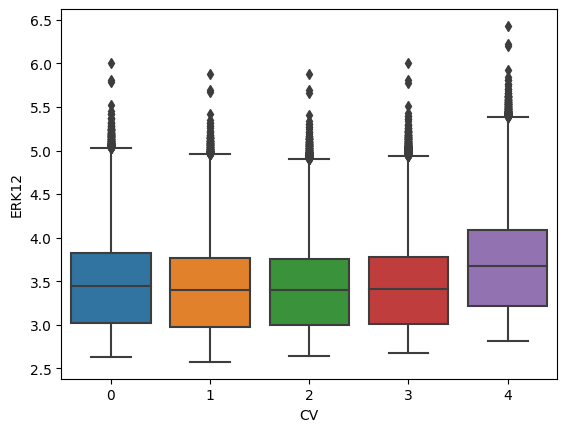

In [9]:
sns.boxplot(data=test_unscaled, x="CV", y="ERK12")

In [10]:
avg_unscaled = test_unscaled.groupby(["cell_line", "treatment", 'time', 'cellID', "fileID"]).mean().reset_index(drop=False)
avg_output = test_output.groupby(["cell_line", "treatment", 'time', 'cellID', "fileID"]).mean().reset_index(drop=False)
avg_true = true_scaled.groupby(["cell_line", "treatment", 'time', 'cellID', "fileID"]).mean().reset_index(drop=False)


In [11]:
true_scaled

CV  cleavedCas  AKT_S473  AKT_T308      AMPK      CREB     ERK12  \
                                                                           
0        0    3.216143  4.565520  3.046575  4.366402  1.590111  3.948889   
1        0    2.366046  3.928950  3.552417  4.080795  1.204535  3.400060   
2        0    2.580432  2.952235  2.831727  2.139580  0.933434  2.714759   
3        0    2.674626  5.484557  3.086064  3.254366  1.516313  3.760111   
4        0    2.445240  3.984473  2.844199  3.199768  1.320900  3.779304   
...     ..         ...       ...       ...       ...       ...       ...   
320302   4    3.338837  2.836948  4.006801  4.604195  1.471700  4.762390   
320303   4    1.839649  3.796737  0.895138  3.672261  1.026742  3.311030   
320304   4    2.427858  3.701014  0.895138  3.791958  0.994471  2.886054   
320305   4    2.629848  4.795299  1.729959  3.910831  1.198373  3.627337   
320306   4    2.497433  2.340796  3.886633  3.894354  0.909243  3.250170   

             FAK    GSK3B        H3  ...       p53    p90RSK        RB  \
                                     ...                                 
0       2.692034  4.50526  3.996872  ...  3.382022  4.165265  5.008706   
1       1.832598  3.66194  3.054282  ...  2.627100  3.671246  4.529482   
2       0.643212  2.19851  2.790804  ...  2.415051  3.054377  3.672501   
3       2.401426  3.75940  3.361715  ...  2.873880  3.995339  4.322024   
4       2.431178  3.94699  3.363313  ...  2.875159  4.012616  4.315159   
...          ...      ...       ...  ...       ...       ...       ...   
320302  3.440238  5.20536  3.992497  ...  3.666926  4.241960  5.285710   
320303  1.345736  3.60246  2.875784  ...  2.663414  3.129662  4.276502   
320304  0.606963  1.12617  2.984194  ...  2.872605  2.803939  4.382909   
320305  1.831821  1.10118  2.915416  ...  2.639782  3.372081  4.331488   
320306  1.248110  4.07602  2.888150  ...  2.690450  3.083017  4.401624   

          SMAD23       SRC  treatment  cell_line  time  cellID  fileID  
                                                                        
0       3.016792  3.833837        EGF      AU565   9.0       1      35  
1       1.957538  2.182407        EGF      AU565   9.0       1      68  
2       2.882754  2.458562        EGF      AU565   9.0       2      35  
3       2.383203  2.100572        EGF      AU565   9.0       2      68  
4       1.730351  2.669826        EGF      AU565   9.0       3      35  
...          ...       ...        ...        ...   ...     ...     ...  
320302  2.972844  3.122438       iPKC   MDAMB436   9.0   12900    2115  
320303  0.551474  1.644971       iPKC   MDAMB436   9.0   12901    2115  
320304  1.792480  2.724057       iPKC   MDAMB436   9.0   12902    2115  
320305  2.607552  2.139663       iPKC   MDAMB436   9.0   12903    2115  
320306  2.222099  0.554053       iPKC   MDAMB436   9.0   12904    2115  

[1601535 rows x 26 columns]

In [12]:
measured_nodes = list(set(test_unscaled.columns).intersection((set(model.nodes) - set(model.root_nodes))))

In [13]:
true = pd.read_csv("/dccstor/ipc1/CAR/DREAM/DREAMdata/Subnetwork_test_t9.csv", index_col=0)

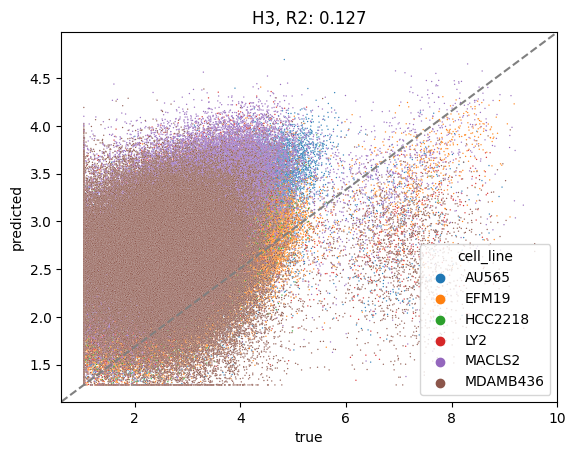

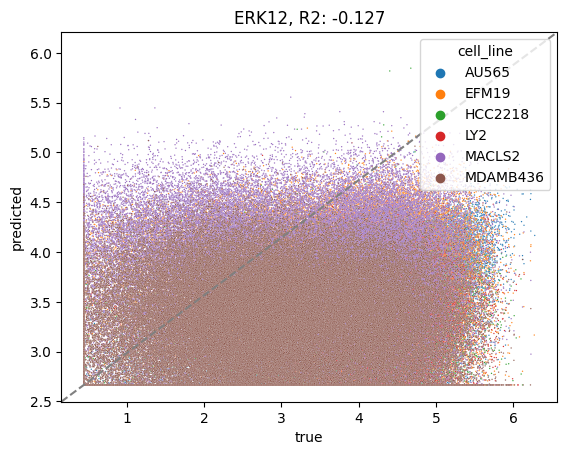

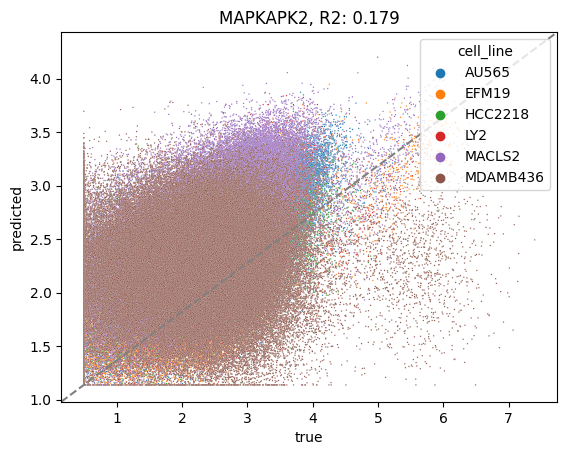

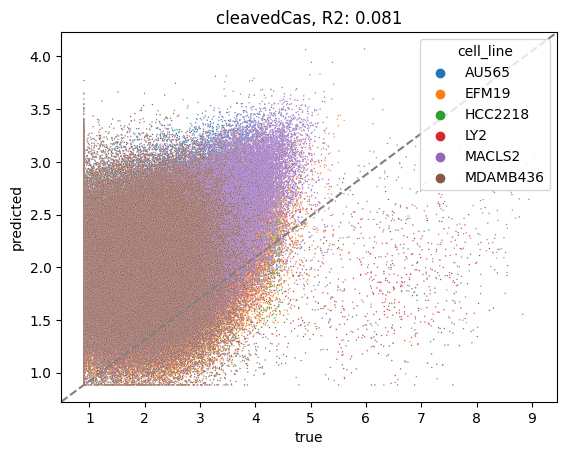

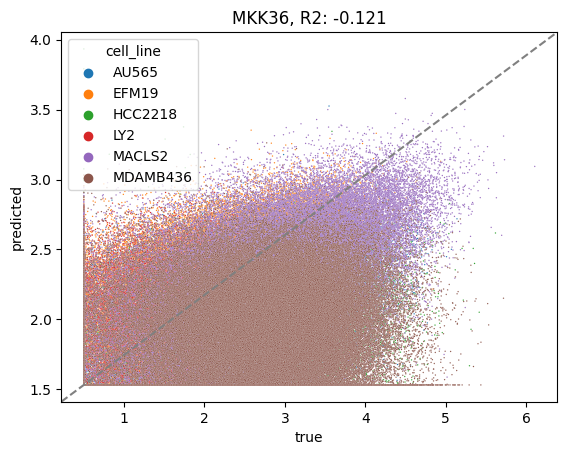

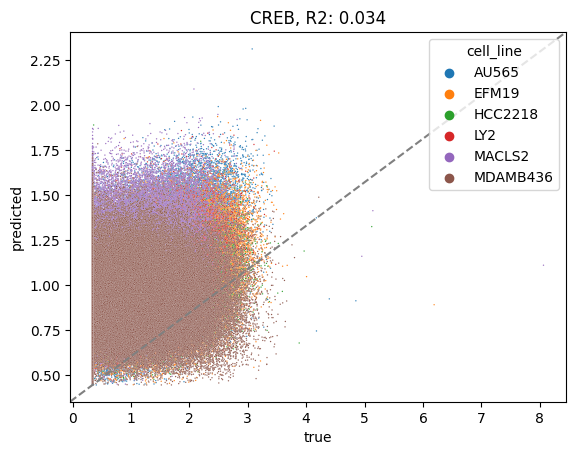

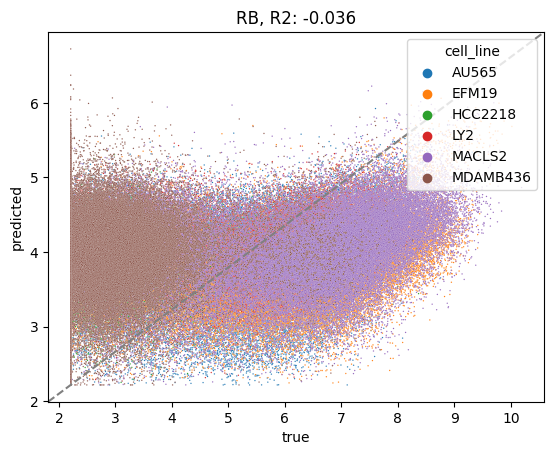

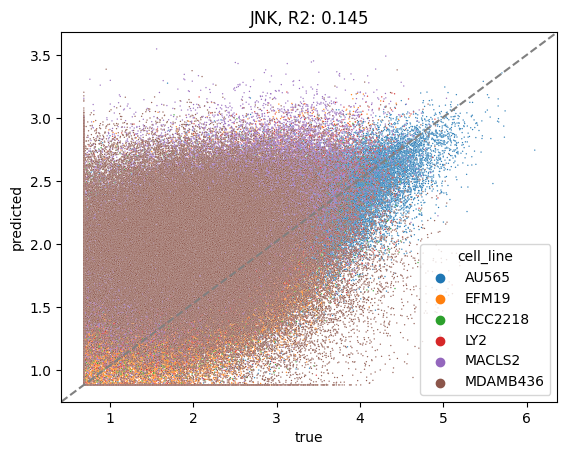

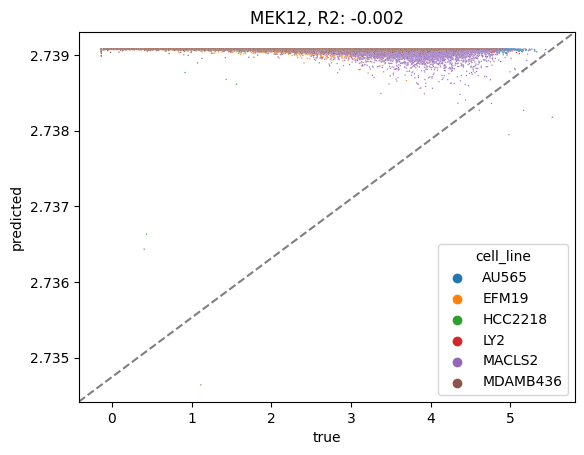

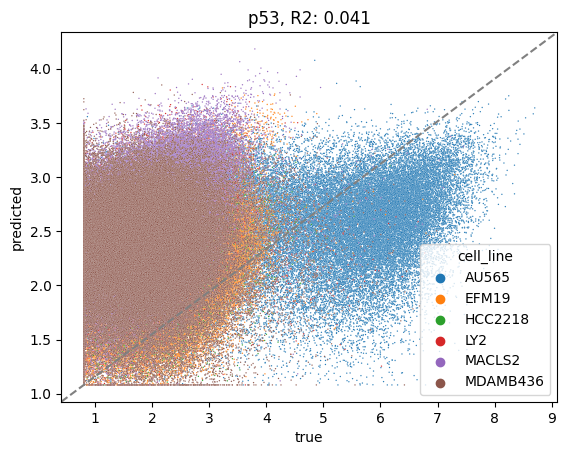

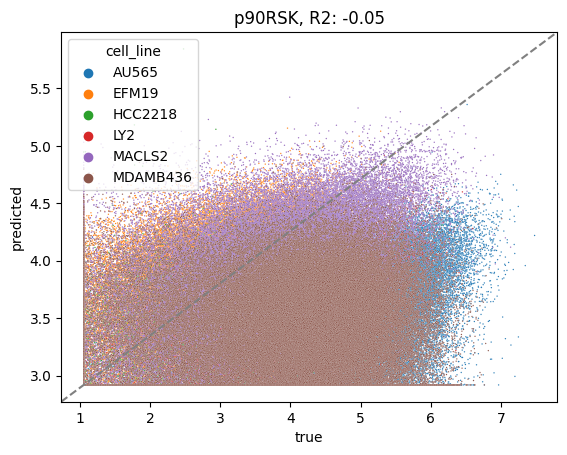

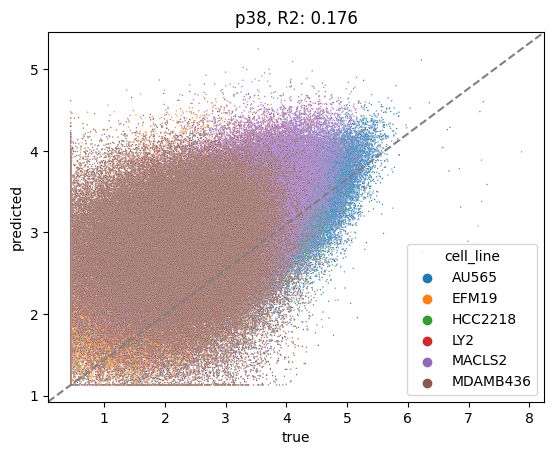

In [14]:
for m in measured_nodes:
    ax = sns.scatterplot(x=true[m], y=avg_unscaled[m], s=1, hue=avg_unscaled["cell_line"])
    ax.plot([0,1], [0,1], transform=ax.transAxes, linestyle="--", color="grey")
    
    plt.title(f"{m}, R2: {round(r2_score(true[m], avg_unscaled[m]), 3)}")
    plt.xlabel("true")
    plt.ylabel("predicted")
    plt.show()

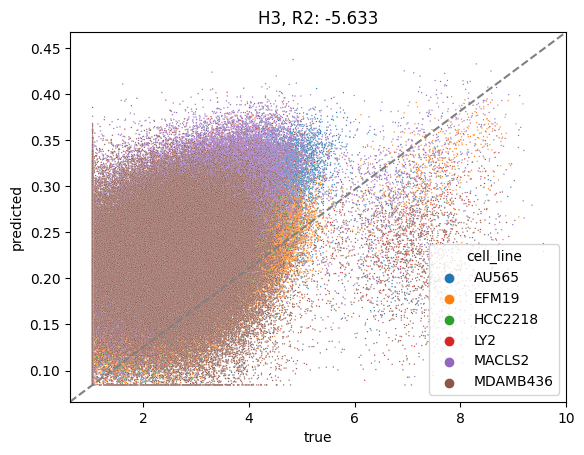

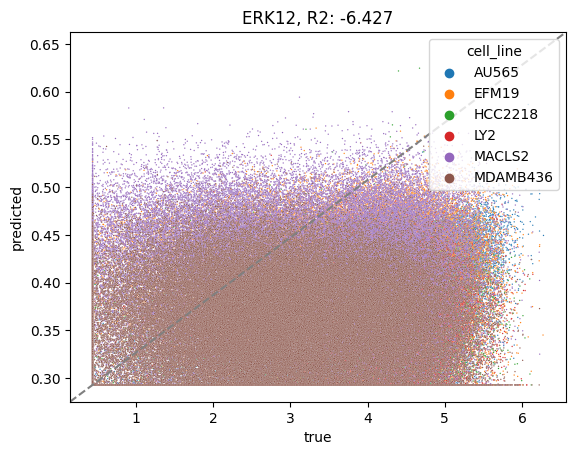

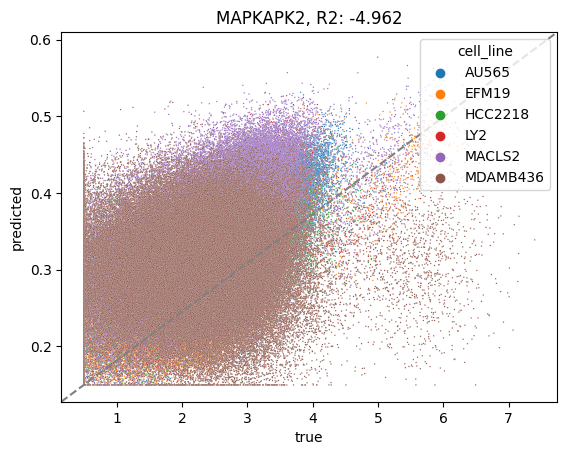

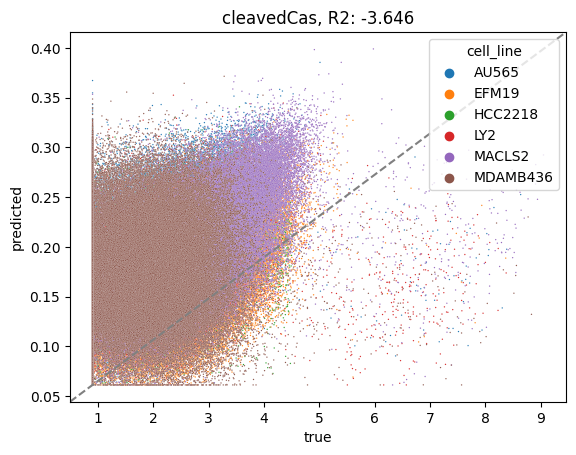

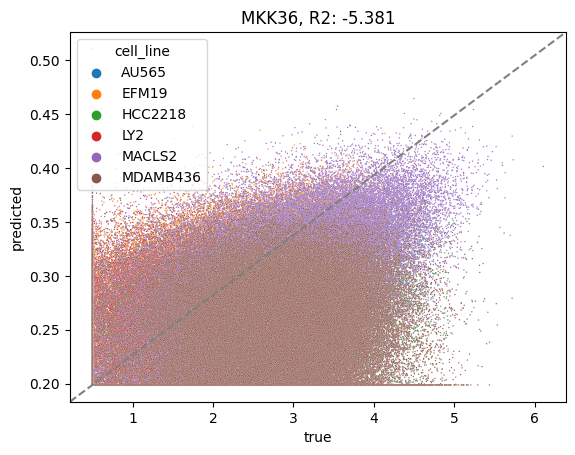

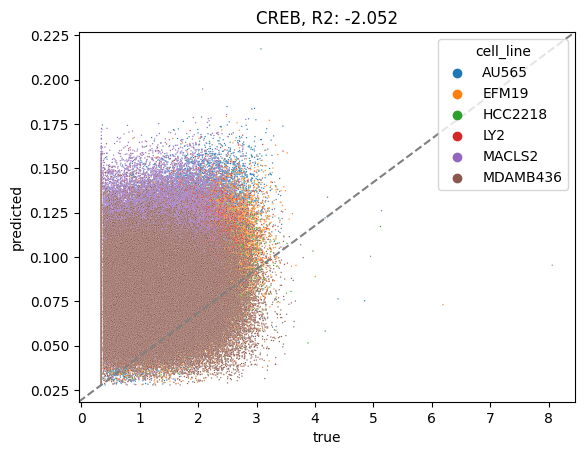

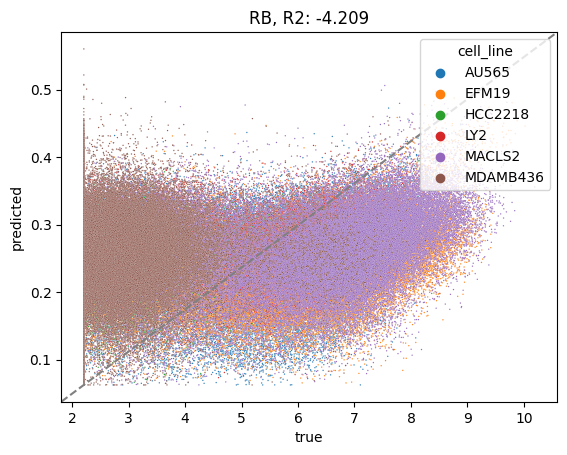

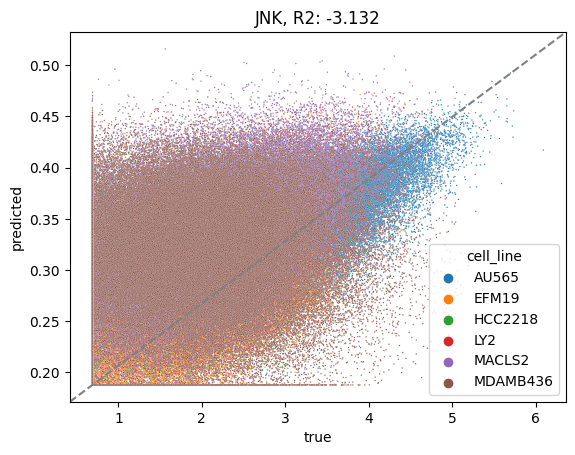

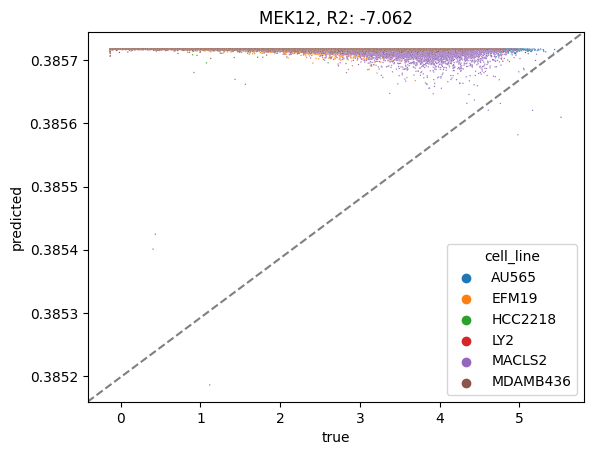

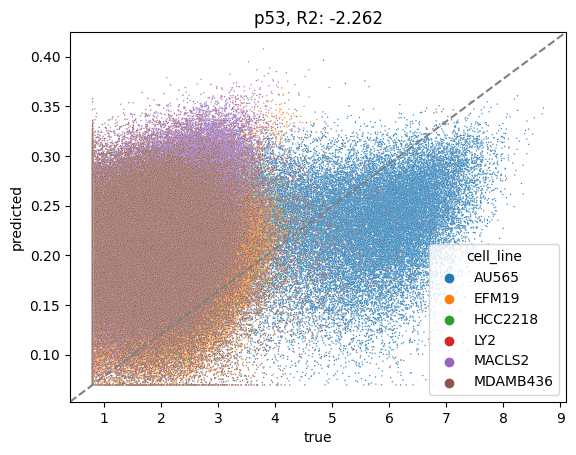

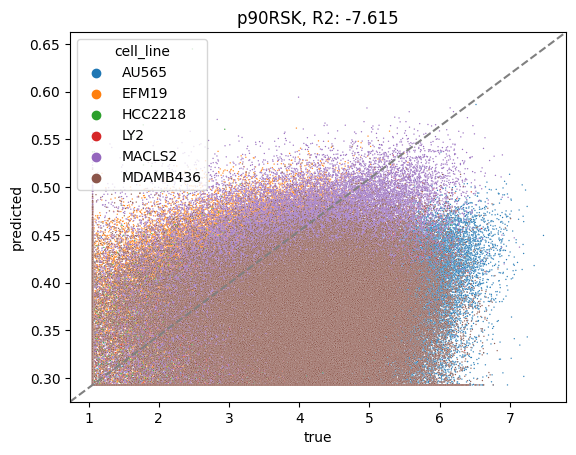

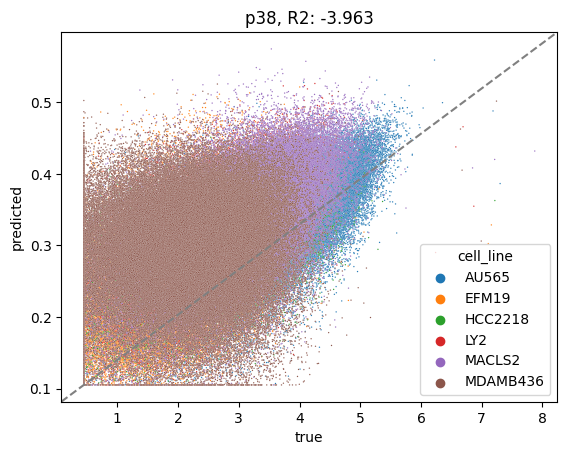

In [15]:
for m in measured_nodes:
    ax = sns.scatterplot(x=true[m], y=avg_output[m], s=1, hue=avg_output["cell_line"])
    ax.plot([0,1], [0,1], transform=ax.transAxes, linestyle="--", color="grey")
    
    plt.title(f"{m}, R2: {round(r2_score(true[m], avg_output[m]), 3)}")
    plt.xlabel("true")
    plt.ylabel("predicted")
    plt.show()

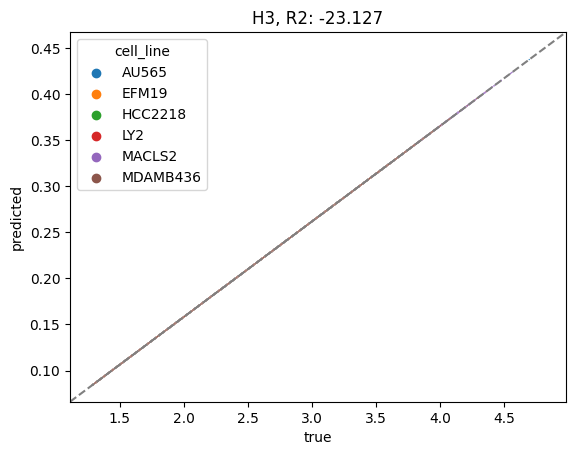

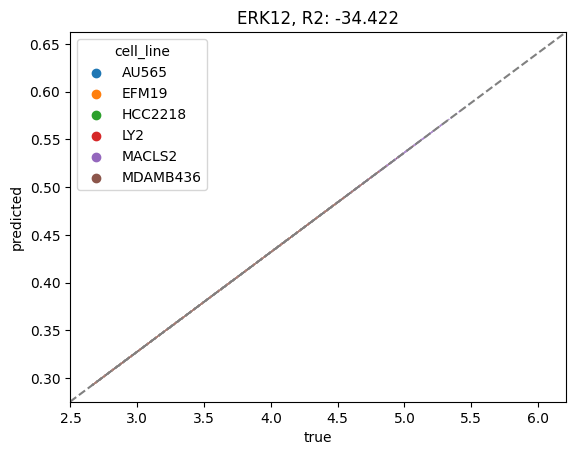

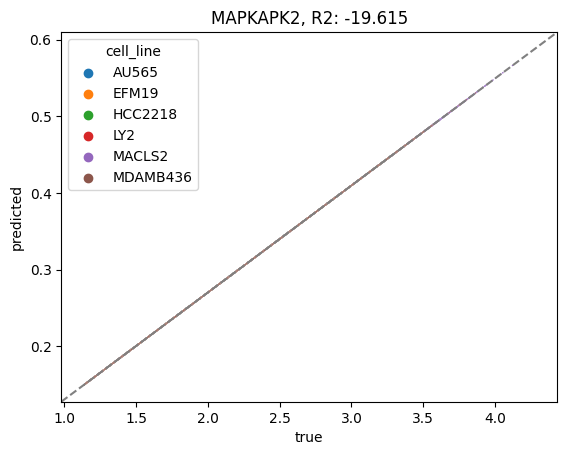

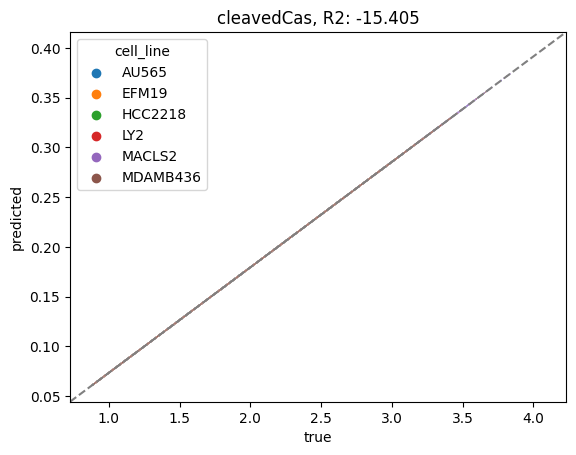

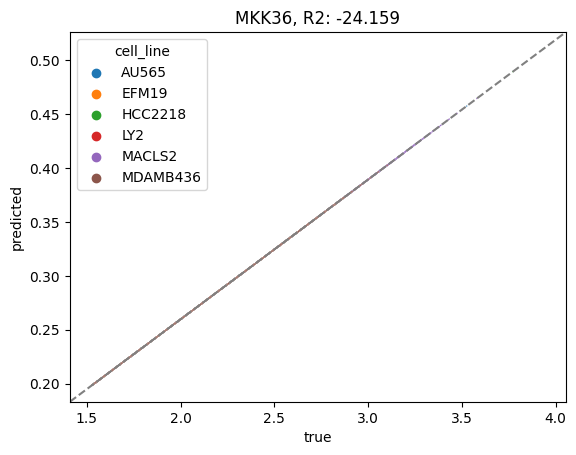

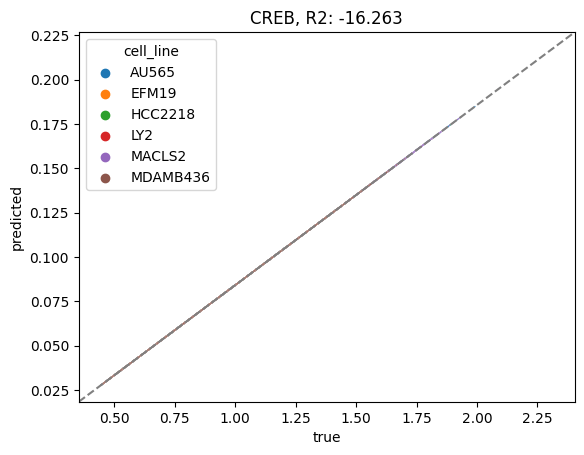

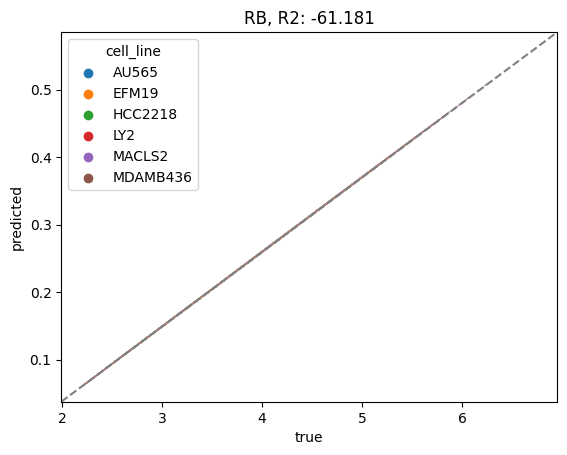

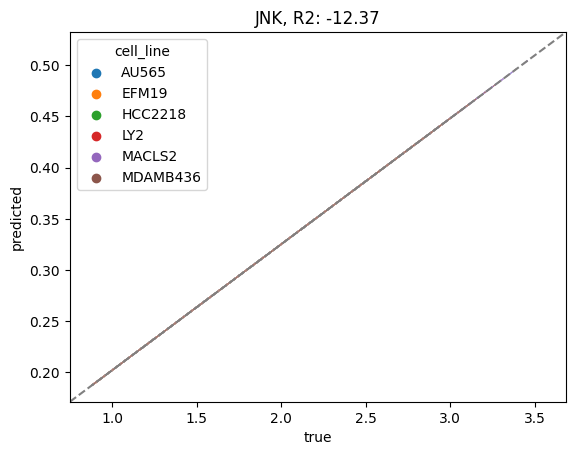

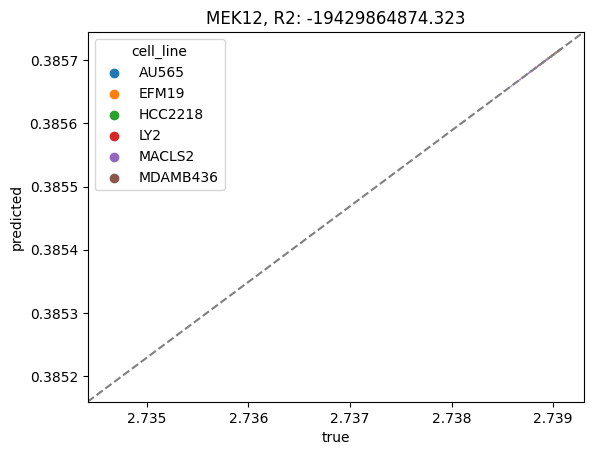

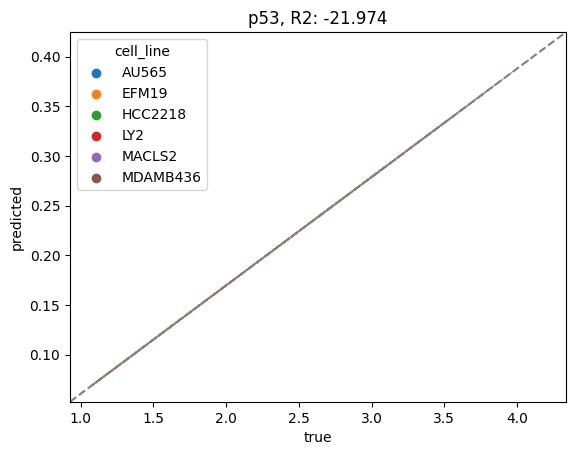

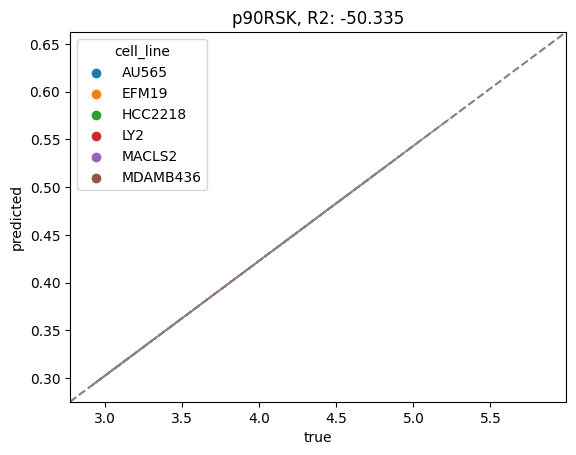

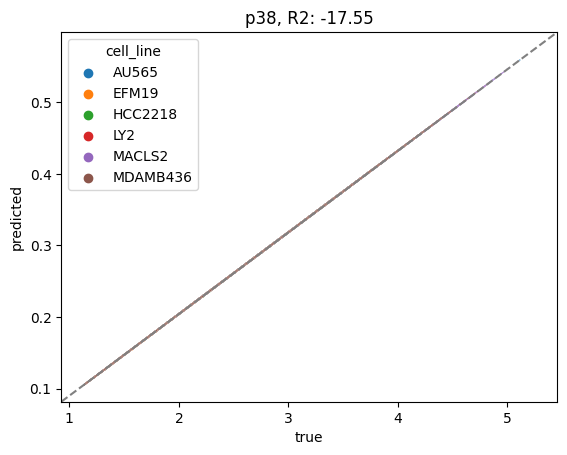

In [16]:
for m in measured_nodes:
    ax = sns.scatterplot(x=avg_true[m], y=avg_output[m], s=1, hue=avg_output["cell_line"])
    ax.plot([0,1], [0,1], transform=ax.transAxes, linestyle="--", color="grey")
    
    plt.title(f"{m}, R2: {round(r2_score(avg_true[m], avg_output[m]), 3)}")
    plt.xlabel("true")
    plt.ylabel("predicted")
    plt.show()

In [17]:
mean_RMSE(true, avg_unscaled, markers = measured_nodes)

1.0291903117449528

In [18]:
measured_nodes


['H3',
 'ERK12',
 'MAPKAPK2',
 'cleavedCas',
 'MKK36',
 'CREB',
 'RB',
 'JNK',
 'MEK12',
 'p53',
 'p90RSK',
 'p38']

In [19]:
(set(model.nodes) - set(model.root_nodes))

{'AKT',
 'CREB',
 'EGFR_and_ERKdm2',
 'ERK12',
 'ERKdm2',
 'H3',
 'JNK',
 'MAPKAPK2',
 'MEK12',
 'MEK12_S221',
 'MKK36',
 'MSK12',
 'RAF',
 'RAS',
 'RB',
 'cleavedCas',
 'not1',
 'or1',
 'or10',
 'or11',
 'or12',
 'or13',
 'or14',
 'or2',
 'or3',
 'or4',
 'or5',
 'or6',
 'or7',
 'or8',
 'or9',
 'p38',
 'p53',
 'p90RSK'}